----
# $k$-Means Clustering

In this notebook we would implement unsupervised machine learning technique. Unlike supervised learning, unsupervised learning deals with *unlabeled* data. 

One more time we would look at palmer penguins, but would not feed the labels into the model. As before we would use SciKit Learn packages.

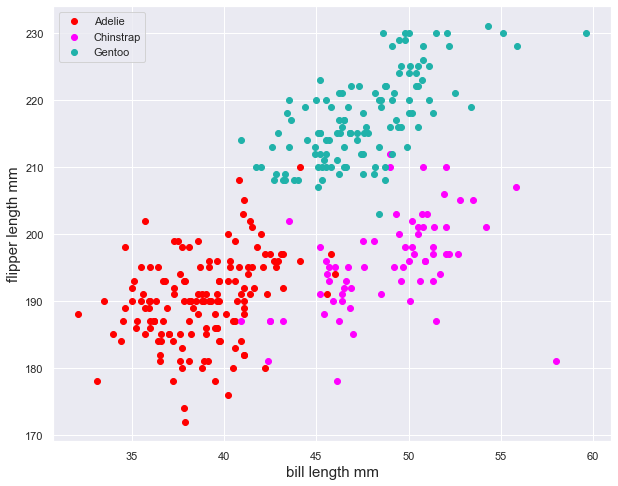

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("palmer_penguins.csv") 
df.dropna(inplace = True)

# Plot the data
penguins = ["Adelie", "Chinstrap", "Gentoo"]
colors = ["red", "magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(penguins, colors):
    temp_df = df[df.species == species]
    ax.scatter(temp_df.bill_length_mm,
               temp_df.flipper_length_mm,
               c = color,
               label = species, 
               )
    
ax.set_xlabel("bill length mm", fontsize = 15)
ax.set_ylabel("flipper length mm", fontsize = 15)
ax.legend()
plt.show()

Let's try using all numerical features available.

In [2]:
X = df[["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]].to_numpy()

In [3]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

Since the dataset has 3 species type, it makes sense to choose 3 clusters for the algorithm.

In [9]:
labels = model.predict(X)

In [12]:
y = df["species"]

In [13]:
# We plot a cross tab matrix to check how well has our K-Means model classified the Species

matrix = pd.DataFrame({'labels': labels, 'species': y})
ct = pd.crosstab(matrix['labels'], matrix['species'])
print(ct)

species  Adelie  Chinstrap  Gentoo
labels                            
0            38         16      50
1           108         52       1
2             0          0      68


---
The matrix shows that most probably label 2 is Gentoo, which in fact it is. The label 1 has heavier weight for Adelie, but in fact it is Chinstrap. Next I would probably use only 2 features so that I would be able to plot the decision boundary.

In [19]:
X = df[["bill_length_mm", "flipper_length_mm"]].to_numpy()

In [20]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [21]:
labels = model.predict(X)

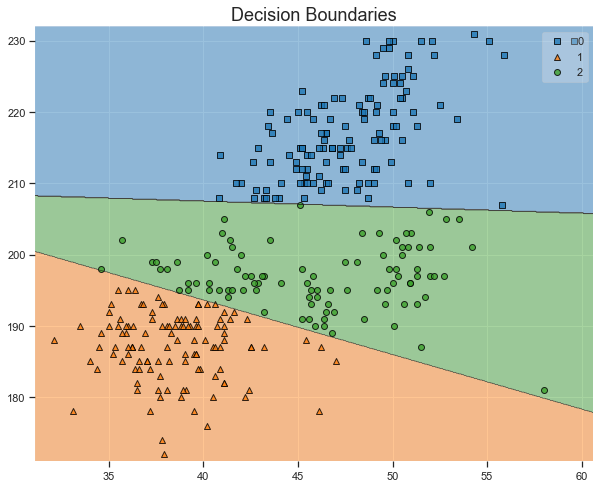

In [22]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, labels, clf = model)

plt.title("Decision Boundaries", fontsize = 18)
plt.show()

This plot looks great! Actually label 1 was Adelie.

Text(0, 0.5, 'Flipper length')

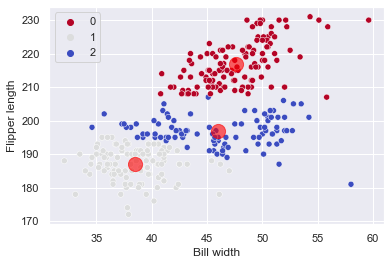

In [30]:
sns.scatterplot(data=df, x="bill_length_mm", y="flipper_length_mm", hue= labels, palette = "coolwarm_r")
centers = model.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha = 0.6);
plt.xlabel("Bill width")
plt.ylabel("Flipper length")


This part of the code was used from https://python.plainenglish.io/k-means-clustering-in-python-9825a280f9cb

### Making Predictions
The clusters and centroids produced from our k-mean algorithm can be used to place any new bill length and flipper length data collected from new penguin species into a cluster, essentially giving us a prediction of the penguin species.

Let's try a new penguin with bill length = 42.5 mm and flipper length = 190 mm, I made out these numbers, but I was thinking to target the Chinstrap.

In [31]:
new_data = [[42.5, 190]]
y_pred = model.predict(new_data)
y_pred

array([1])

The prediction is Adelie, maybe if the flipper length is longer, it would predict Chinstarp?

In [32]:
new_data = [[42.5, 200]]
y_pred = model.predict(new_data)
y_pred

array([2])

yes! Chinstrap it is!

---
## Principle component analysis

One more useful concpet would be PCA, which is used to reduce dimentionality of the features.
I would try to use PCA on all features of penguins and see of the result improves.

Reference: https://cmdlinetips.com/2020/06/principal-component-analysis-with-penguins-data-in-python/

In [38]:
from sklearn.decomposition import PCA

 
df_num=df.select_dtypes(np.number)
df_info=df.select_dtypes(exclude='float')
sex=df_info.sex.tolist()
species=df_info.species.tolist()

pca = PCA(n_components=4)
df_pca= pca.fit_transform(df_num)

In [39]:
pca.explained_variance_ratio_

array([9.92445626e-01, 7.48793554e-03, 4.14187005e-05, 2.28440336e-05])

Checking the variance explained by each Principal Component. We can get the variance explained by each PC from explained_variance_ratio_ method on PCA model. A quick look at the variance show that, the first PC explains all of the variation. This happens when the data is of different ranges. So the next step would be scaling the data.

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

random_state = 0
pca_scaled = make_pipeline(StandardScaler(), PCA(n_components=4, random_state=random_state))
df_pc_scaled=pca_scaled.fit_transform(df_num)

In [42]:
pca_scaled.named_steps['pca'].explained_variance_ratio_*100


array([71.42817485, 15.6849255 ,  8.51048835,  2.69997581])

Now the variantion is more spread 71% is from the first component and 15% from the second.

In [43]:
pc_scaled_df = pd.DataFrame(data = df_pc_scaled , 
        columns = ['PC1', 'PC2','PC3', 'PC4'])
pc_scaled_df['Species'] = species
pc_scaled_df['Sex'] = sex
pc_scaled_df.head()

,PC1,PC2,PC3,PC4,Species,Sex
0,-2.494241,0.075175,-0.450184,0.694568,Adelie,Male
1,-2.010998,-0.370569,-0.412146,0.872913,Adelie,Female
2,-2.052894,-0.104970,-0.144204,0.274092,Adelie,Female
3,-2.504855,0.032829,-0.748559,-0.149098,Adelie,Female
4,-2.543144,0.857766,-0.751713,-0.054777,Adelie,Male


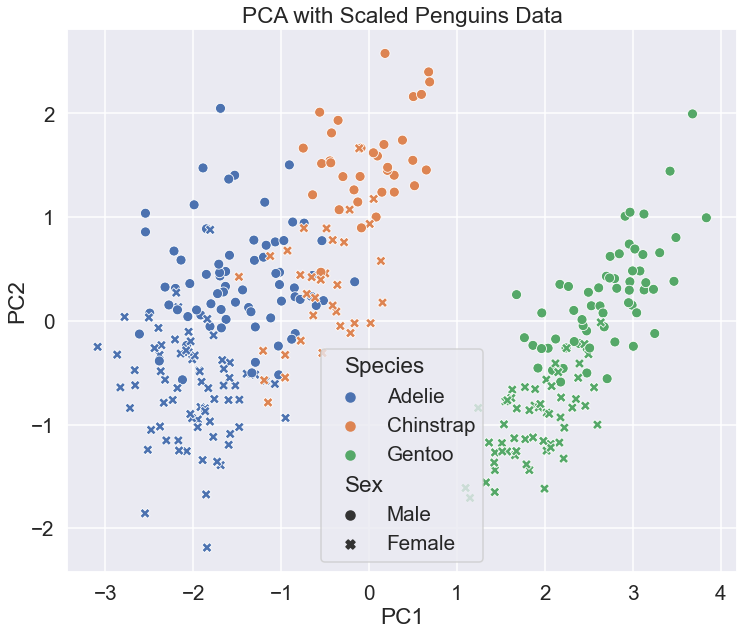

In [45]:
plt.figure(figsize=(12,10))
with sns.plotting_context("talk",font_scale=1.25):
    sns.scatterplot(x="PC1", y="PC2",
                    data=pc_scaled_df, 
                    hue="Species",
                    style="Sex",
                    s=100)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA with Scaled Penguins Data")
plt.savefig("PCA_plot_PC1_vs_PC2_Penguins_scaled_data.png",
                    format='png',dpi=150)

Now, let's look at first two components and see how they contribute to the prediction.

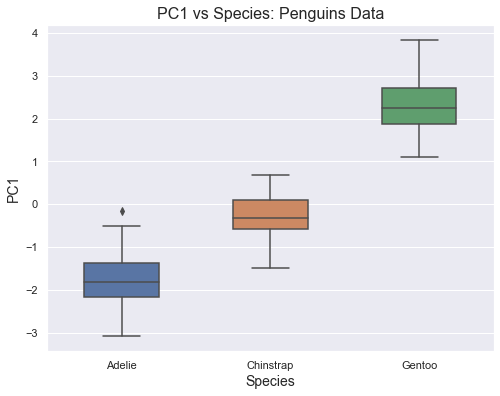

In [46]:
sns.plotting_context("talk",font_scale=1.25)
plt.figure(figsize=(8,6))
sns.boxplot(x="Species",y="PC1",
            width=0.5,
            data=pc_scaled_df)
plt.xlabel("Species", size=14)
plt.ylabel("PC1", size=14)
plt.title("PC1 vs Species: Penguins Data", size=16)
plt.savefig("PCA_plot_PC1_vs_Species_Penguins_scaled_data.png",
                    format='png',dpi=150)

So the first component is the one that differentiates between three species. The main component.

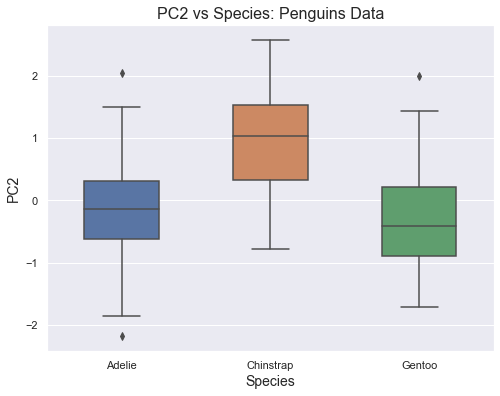

In [48]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Species",y="PC2",
            width=0.5,
            data=pc_scaled_df)
plt.xlabel("Species", size=14)
plt.ylabel("PC2", size=14)
plt.title("PC2 vs Species: Penguins Data", size=16)
plt.savefig("PCA_plot_PC2_vs_Species_Penguins_scaled_data.png",
                    format='png',dpi=150)

The component number 2 is more focusing on how the Chinstrap is different from others. 